In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv',encoding = 'ISO-8859-1')

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

## Step A :Data Cleaning

In [5]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [7]:
df.rename(columns = {'v1':'Target','v2':'Text'}, inplace=True)

In [8]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [9]:
df['Target'] = enc.fit_transform(df['Target'])

In [10]:
## check if there is any missing values or not
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [11]:
## check duplicate values
df.duplicated().sum()

403

In [12]:
# drop duplicate values 
df = df.drop_duplicates(keep='first')

In [13]:
df.duplicated().sum()

0

# Step B : EDA

In [14]:
import seaborn as sns

In [15]:
df['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

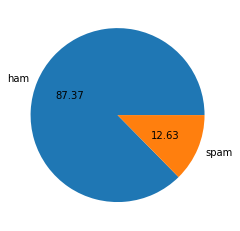

In [16]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(), labels = ['ham','spam'], autopct=  '%0.2f');

Data is imbalanced as ham is very high in number than spam

In [17]:
import nltk

In [18]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\krishnendu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
df['nums_of_chars'] = df["Text"].apply(len)

C:\Users\krishnendu\AppData\Local\Temp\ipykernel_18048\4022328191.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nums_of_chars'] = df["Text"].apply(len)


In [20]:
df

,Target,Text,nums_of_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [21]:
#  Find num of words
df['num_of_words'] = df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))

C:\Users\krishnendu\AppData\Local\Temp\ipykernel_18048\2492316908.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_of_words'] = df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))


In [22]:
#  Find num of sentence
df['num_of_senmtences'] = df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))

C:\Users\krishnendu\AppData\Local\Temp\ipykernel_18048\2900639072.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_of_senmtences'] = df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [23]:
df

,Target,Text,nums_of_chars,num_of_words,num_of_senmtences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [24]:
df.describe()

,Target,nums_of_chars,num_of_words,num_of_senmtences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [25]:
not_spam = df[df['Target'] == 0][['nums_of_chars','num_of_words','num_of_senmtences']]

In [26]:
spam = df[df['Target'] == 1][['nums_of_chars','num_of_words','num_of_senmtences']]

In [27]:
not_spam.describe()

,nums_of_chars,num_of_words,num_of_senmtences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
spam.describe()

,nums_of_chars,num_of_words,num_of_senmtences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<AxesSubplot:xlabel='nums_of_chars', ylabel='Count'>

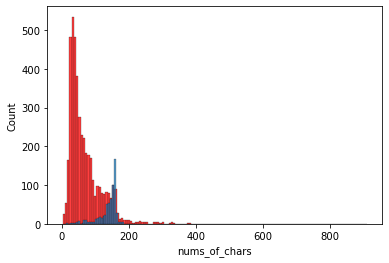

In [29]:

sns.histplot(data=not_spam,x = 'nums_of_chars',color='red')
sns.histplot(data=spam,x = 'nums_of_chars')

<AxesSubplot:xlabel='num_of_words', ylabel='Count'>

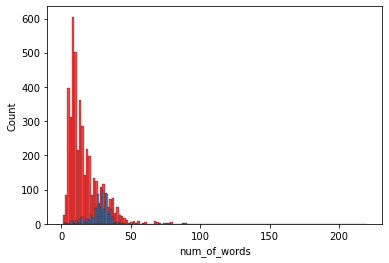

In [30]:
sns.histplot(data=not_spam,x = 'num_of_words',color='red')
sns.histplot(data=spam,x = 'num_of_words')

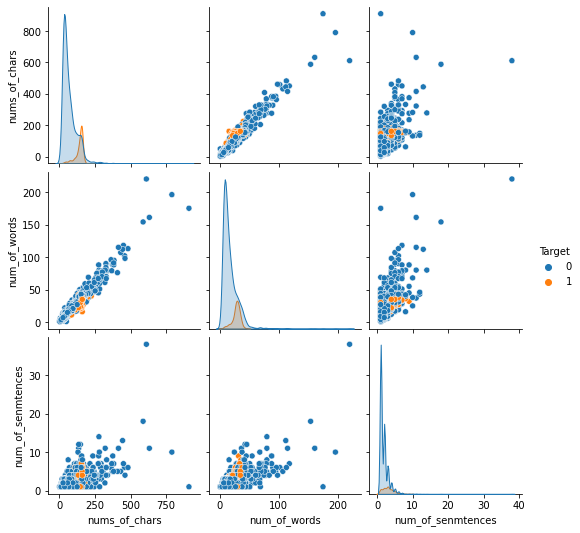

In [31]:
sns.pairplot(df,hue = 'Target')

<AxesSubplot:>

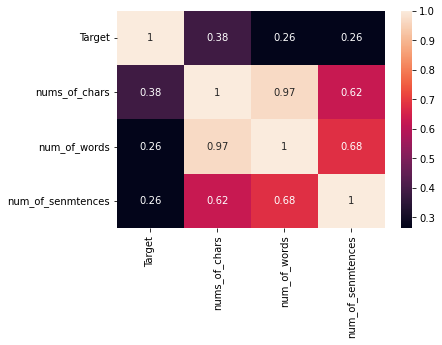

In [32]:
sns.heatmap(df.corr(),annot = True)

# Data Processing 

Lower case
* Tokenization
* Removing special 
* Removing stop words and punctuation
* Stemming

In [33]:
from nltk.corpus import stopwords

In [34]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [35]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [36]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [37]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    valid_text = []
    for i in text:
        if i.isalnum():
            if i not in stopwords.words('english') and i not in string.punctuation:
                valid_text.append(i)
    stem_words = []
    for i in valid_text:
        stem_words.append(ps.stem(i))
            
    return " ".join(stem_words)

In [38]:
transform_text("How are you ? what are you doing today, are you coming to my home?")

'today come home'

In [39]:
df['Transformed_text'] = df['Text'].apply(transform_text)

C:\Users\krishnendu\AppData\Local\Temp\ipykernel_18048\1235748540.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Transformed_text'] = df['Text'].apply(transform_text)


In [40]:
df.head()

,Target,Text,nums_of_chars,num_of_words,num_of_senmtences,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# Word cloud spam

In [41]:
from wordcloud import WordCloud
wc = WordCloud(width = 1000, height = 1000, min_font_size = 10, background_color = 'white')

In [42]:
spam_wc = wc.generate(df[df['Target']==1]['Transformed_text'].str.cat(sep = " "))

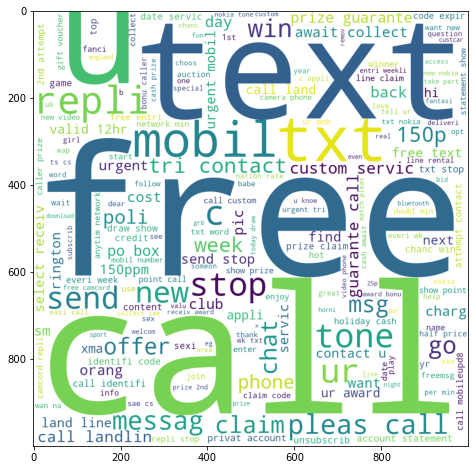

In [43]:
plt.figure(figsize = (10,8))
plt.imshow(spam_wc)

In [44]:
hamm_wc = wc.generate(df[df['Target']==0]['Transformed_text'].str.cat(sep = " "))

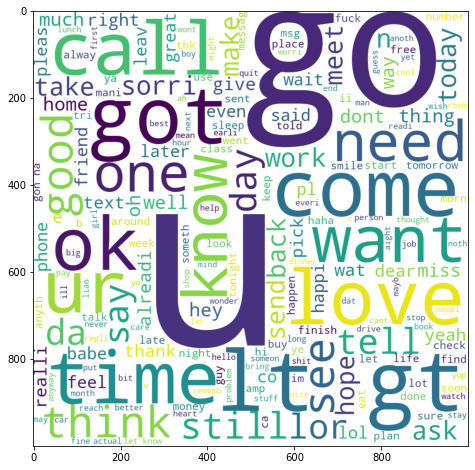

In [45]:
plt.figure(figsize = (10,8))
plt.imshow(hamm_wc)

In [46]:
spam_words= []
for msg in df[df['Target']==1]['Transformed_text'].tolist():
    for words in msg.split():
        spam_words.append(words)

In [47]:
len(spam_words)
from collections import Counter

In [48]:
x = pd.DataFrame(Counter(spam_words).most_common(30))[0]
y = pd.DataFrame(Counter(spam_words).most_common(30))[1]

<AxesSubplot:xlabel='1', ylabel='0'>

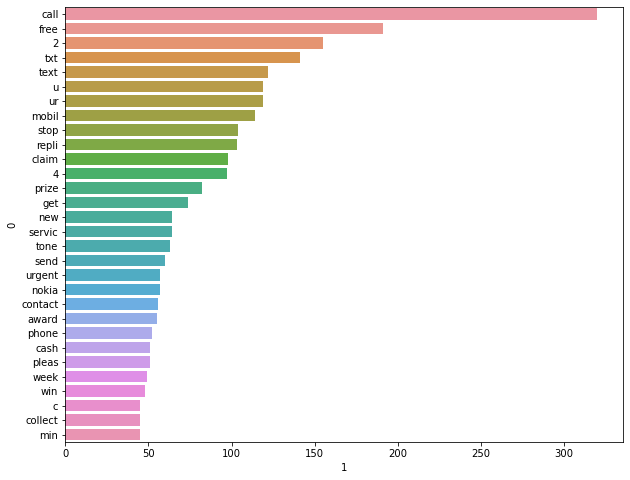

In [49]:
plt.figure(figsize = (10,8))
from collections import Counter
sns.barplot(data = pd.DataFrame(Counter(spam_words).most_common(30)),x = y, y = x, orient='h')

<AxesSubplot:xlabel='1', ylabel='0'>

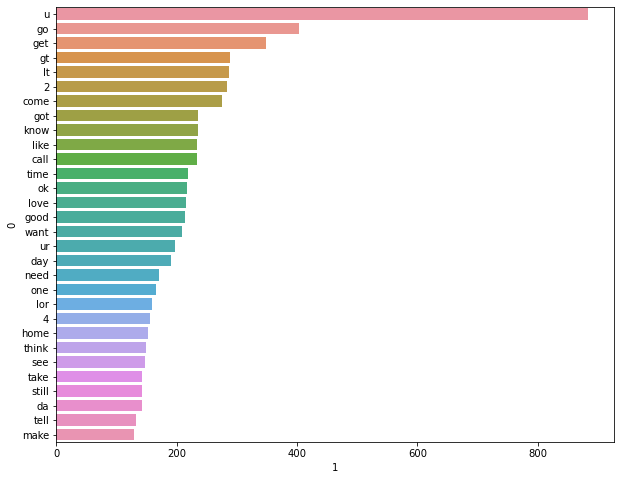

In [50]:
hamm_words= []
for msg in df[df['Target']==0]['Transformed_text'].tolist():
    for words in msg.split():
        hamm_words.append(words)
x = pd.DataFrame(Counter(hamm_words).most_common(30))[0]
y = pd.DataFrame(Counter(hamm_words).most_common(30))[1]
        
plt.figure(figsize = (10,8))
from collections import Counter
sns.barplot(data = pd.DataFrame(Counter(hamm_words).most_common(30)),x = y, y = x, orient='h')

# 4. Model Preparing

In [51]:
# Change text to vectors
# word to vec
# TFIK

In [100]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [101]:
X = cv.fit_transform(df['Transformed_text']).toarray()

In [102]:
X.shape

(5169, 6708)

In [103]:
Y = df['Target'].values

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [106]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [107]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [108]:
gnb.fit(x_train,y_train)

GaussianNB()

In [61]:
# GAssian naive based
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [62]:
# multi nominal naive based
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [63]:
# Bi-nomional naive based
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


# Tfidf vectorizer used

In [109]:
X1 = tfidf.fit_transform(df['Transformed_text']).toarray()

In [110]:
x1_train,x1_test,y1_train,y1_test = train_test_split(X1,Y,test_size=0.2,random_state=2)

In [66]:
gnb1 = GaussianNB()
mnb1 = MultinomialNB()
bnb1 = BernoulliNB()

In [67]:
# GAssian naive based
gnb1.fit(x1_train,y1_train)
y_pred11 = gnb1.predict(x1_test)
print(accuracy_score(y1_test,y_pred11))
print(confusion_matrix(y1_test,y_pred11))
print(precision_score(y1_test,y_pred11))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [68]:
# Mulnomial naive based
mnb1.fit(x1_train,y1_train)
y_pred12 = mnb1.predict(x1_test)
print(accuracy_score(y1_test,y_pred12))
print(confusion_matrix(y1_test,y_pred12))
print(precision_score(y1_test,y_pred12))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [69]:
# Binomial naive based
bnb1.fit(x1_train,y1_train)
y_pred13 = bnb1.predict(x1_test)
print(accuracy_score(y1_test,y_pred13))
print(confusion_matrix(y1_test,y_pred13))
print(precision_score(y1_test,y_pred13))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [70]:
# From this anaysis we can say multinomial analysis is most acceptable as precission matters in this case

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [91]:
lrc = LogisticRegression(solver='liblinear',penalty = 'l1')
svc = SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
rfc = RandomForestClassifier(n_estimators=60,random_state=3)
adbc = AdaBoostClassifier(n_estimators=60, random_state=3)
bc = BaggingClassifier(n_estimators=60, random_state=3)
etc = ExtraTreesClassifier(n_estimators=60, random_state=3)
gbdt = GradientBoostingClassifier(n_estimators=60, random_state=3)
knc = KNeighborsClassifier()

In [73]:
clfs = {
    'SVC': svc,
    'NB': mnb,
    'DTC': dtc,
    'RFC':rfc,
    'ADBC':adbc,
    'BC':bc,
    'ETC':etc,
    'LRC':lrc,
    'GBDT':gbdt
    
}

In [74]:
def train_classifier(clf,x_train,x_test,y_train,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precission = precision_score(y_test,y_pred)
    
    return accuracy,precission

In [75]:
train_classifier(knc,x1_train,x1_test,y1_train,y1_test)

AttributeError: 'NoneType' object has no attribute 'split'

In [76]:
accuracy = []
precision = []

for name,clf in clfs.items():
    
    clf_accuracy,clf_precission = train_classifier(clf,x1_train,x1_test,y1_train,y1_test)
    
    print("For",name)
    print("Accuracy - ", clf_accuracy)
    print("Precission - ",clf_precission)
    
    accuracy.append(clf_accuracy)
    precision.append(clf_precission)
    

For SVC
Accuracy -  0.9729206963249516
Precission -  0.9741379310344828
For NB
Accuracy -  0.9593810444874274
Precission -  1.0
For DTC
Accuracy -  0.9352030947775629
Precission -  0.8380952380952381
For RFC
Accuracy -  0.9709864603481625
Precission -  1.0
For ADBC
Accuracy -  0.9613152804642167
Precission -  0.9298245614035088
For BC
Accuracy -  0.9632495164410058
Precission -  0.8731343283582089
For ETC
Accuracy -  0.9758220502901354
Precission -  0.991304347826087
For LRC
Accuracy -  0.9516441005802708
Precission -  0.94
For GBDT
Accuracy -  0.9545454545454546
Precission -  0.9252336448598131


* The model of RFC and NB have precision of 1.
* The accuracy of RFC is little bit high than NB
* One more model can be consider as ETC

In [77]:
performance_df = pd.DataFrame({"Algorithm":clfs.keys(),"Accuracy": accuracy ,"Precision":precision}).sort_values("Precision",ascending=False)

In [78]:
performance_df

,Algorithm,Accuracy,Precision
1,NB,0.959381,1.000000
3,RFC,0.970986,1.000000
6,ETC,0.975822,0.991304
0,SVC,0.972921,0.974138
7,LRC,0.951644,0.940000
4,ADBC,0.961315,0.929825
8,GBDT,0.954545,0.925234
5,BC,0.963250,0.873134
2,DTC,0.935203,0.838095


In [79]:
performance_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 1 to 2
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Algorithm  9 non-null      object 
 1   Accuracy   9 non-null      float64
 2   Precision  9 non-null      float64
dtypes: float64(2), object(1)
memory usage: 288.0+ bytes


In [80]:
performance_df1 = pd.melt(performance_df,id_vars='Algorithm')

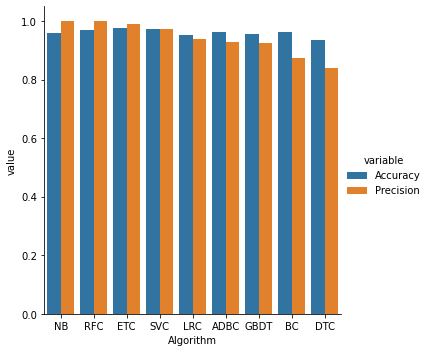

In [81]:
sns.catplot(x ='Algorithm', y='value',hue='variable',data = performance_df1, kind = 'bar', height = 5)


In [82]:
# Improve the model 
# Taking the max_variable num = 1000 

In [111]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)
X = tfidf.fit_transform(df['Transformed_text']).toarray()
print("shape",X.shape)
Y = df['Target'].values
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2)
lrc = LogisticRegression(solver='liblinear',penalty = 'l1')
svc = SVC(kernel='sigmoid',gamma=1.0)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
rfc = RandomForestClassifier(n_estimators=30,random_state=3)
adbc = AdaBoostClassifier(n_estimators=30, random_state=3)
bc = BaggingClassifier(n_estimators=30, random_state=3)
etc = ExtraTreesClassifier(n_estimators=30, random_state=3)
gbdt = GradientBoostingClassifier(n_estimators=30, random_state=3)
knc = KNeighborsClassifier()
accuracy1 = []
precision1 = []

for name,clf in clfs.items():
    
    clf_accuracy,clf_precission = train_classifier(clf,x_train,x_test,y_train,y_test)
    
    print("For",name)
    print("Accuracy - ", clf_accuracy)
    print("Precission - ",clf_precission)
    
    accuracy1.append(clf_accuracy)
    precision1.append(clf_precission)
performance_df2 = pd.DataFrame({"Algorithm":clfs.keys(),"Accuracy": accuracy1 ,"Precision":precision1}).sort_values("Precision",ascending=False)
performance_df2

shape (5169, 3000)
For SVC
Accuracy -  0.9758220502901354
Precission -  0.9747899159663865
For NB
Accuracy -  0.9709864603481625
Precission -  1.0
For DTC
Accuracy -  0.9323017408123792
Precission -  0.8333333333333334
For RFC
Accuracy -  0.97678916827853
Precission -  0.9830508474576272
For ADBC
Accuracy -  0.9690522243713733
Precission -  0.9649122807017544
For BC
Accuracy -  0.9584139264990329
Precission -  0.8518518518518519
For ETC
Accuracy -  0.97678916827853
Precission -  0.975
For LRC
Accuracy -  0.9584139264990329
Precission -  0.9702970297029703
For GBDT
Accuracy -  0.9487427466150871
Precission -  0.9207920792079208


,Algorithm,Accuracy,Precision
1,NB,0.970986,1.000000
3,RFC,0.976789,0.983051
6,ETC,0.976789,0.975000
0,SVC,0.975822,0.974790
7,LRC,0.958414,0.970297
4,ADBC,0.969052,0.964912
8,GBDT,0.948743,0.920792
5,BC,0.958414,0.851852
2,DTC,0.932302,0.833333


So no max_feratures 1st 3 models are giving best model

# Lets try voting classifier

In [86]:
from sklearn.ensemble import VotingClassifier


 We will use the algforithms naive-baised, Randomforest, and Extra Tress classifiers as our estimators

In [112]:
rfc = RandomForestClassifier(n_estimators=30,random_state=3)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=30, random_state=3)
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['Transformed_text']).toarray()
Y = df['Target'].values
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [113]:
voting = VotingClassifier(estimators=[('rfc',rfc),('nb',mnb),('et',etc)],voting = 'soft')

In [114]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('rfc',
                              RandomForestClassifier(n_estimators=30,
                                                     random_state=3)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=30,
                                                   random_state=3))],
                 voting='soft')

In [115]:
y_pred = voting.predict(x_test)
print("Acuracy",accuracy_score(y_test,y_pred))
print('Precission',precision_score(y_test,y_pred))

Acuracy 0.9738878143133463
Precission 1.0


## Voting classifier is performing  good than RFC as in this case we are getting a little bit more accuracy than RFC model with the same precision of 1

# Applying staking

In [116]:
rfc = RandomForestClassifier(n_estimators=30,random_state=3)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=30, random_state=3)
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['Transformed_text']).toarray()
Y = df['Target'].values
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2)
estimators = [('rfc',rfc),('nb',mnb),('etc',etc)]
final_estimator = RandomForestClassifier()

In [117]:
from sklearn.ensemble import StackingClassifier

In [118]:
clf = StackingClassifier(estimators=estimators, final_estimator= final_estimator)

In [119]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9729206963249516
Precision 0.9104477611940298


## The precision of the bagging classifier is not good than RFC , though the Accuracy is increased but our priority is precision rather than Accuracy

In [121]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl','wb'))
pickle.dump(voting,open('model.pkl','wb'))